### SOM-3

In [30]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter("ignore")

In [32]:
dataset_iris = datasets.load_iris()
data_iris = dataset_iris.data
target_iris = dataset_iris.target

In [34]:
data_iris_normalized = MinMaxScaler().fit_transform(data_iris)
labels_iris = {1:'1', 2:'2', 3:'3'}
data = data_iris_normalized
target = target_iris

#### The X and Y dimensions of the grid
#### The number of input variables - this is the number of data rows. 

In [37]:
SOM_X_AXIS_NODES  = 8
SOM_Y_AXIS_NODES  = 8
SOM_N_VARIABLES  = data.shape[1]

In [39]:
som = MiniSom(SOM_X_AXIS_NODES, SOM_Y_AXIS_NODES, SOM_N_VARIABLES)

##### Declare other parameters and hyperparameters while creating the SOM grid
##### And create SOM accordingly

In [42]:
ALPHA = 0.5
DECAY_FUNC = 'linear_decay_to_zero'
SIGMA0 = 2 #1.5
SIGMA_DECAY_FUNC = 'linear_decay_to_one'
NEIGHBORHOOD_FUNC = 'triangle'
DISTANCE_FUNC = 'euclidean'
TOPOLOGY = 'rectangular'
RANDOM_SEED = 123

In [44]:
som = MiniSom(
        SOM_X_AXIS_NODES,
        SOM_Y_AXIS_NODES,
        SOM_N_VARIABLES,
        sigma=SIGMA0,
        learning_rate=ALPHA,
        neighborhood_function=NEIGHBORHOOD_FUNC,
        activation_distance=DISTANCE_FUNC,
        topology=TOPOLOGY,
        sigma_decay_function = SIGMA_DECAY_FUNC,
        decay_function = DECAY_FUNC,
        random_seed=RANDOM_SEED,
        )

##### Initializing the neurons

In [47]:
# Random initialization: The neurons' initial weights are randomly drawn from the input data. We do this by applying the .random_weights_init() function to the SOM. 
# PCA initialization: Principal Component Analysis (PCA) initialization uses the principal components of the input data to initialize the weights. 
# The initial weights of the neurons span the first two principal components. This often leads to faster convergence. 
som.pca_weights_init(data)

#### Training the SOM

In [50]:
N_ITERATIONS = 5000
som.train_random(data, N_ITERATIONS, verbose=True)  

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.06029091597720087


#### Visualizing SOM neurons 
##### To visualize it, we use a distance map (also known as a U-matrix). The distance map displays the SOM’s neurons as a grid of cells. The color of each cell represents its distance from the neighboring neurons. 

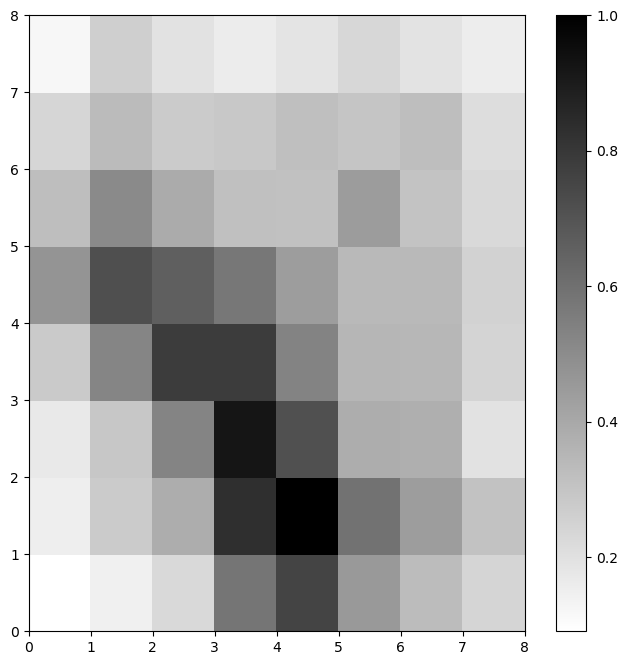

In [57]:
# create the grid
plt.figure(figsize=(8, 8))
#plot the distance map
plt.pcolor(som.distance_map().T, cmap='gist_yarg') 
# show the color bar
plt.colorbar()
plt.show()

#### Identifying clusters

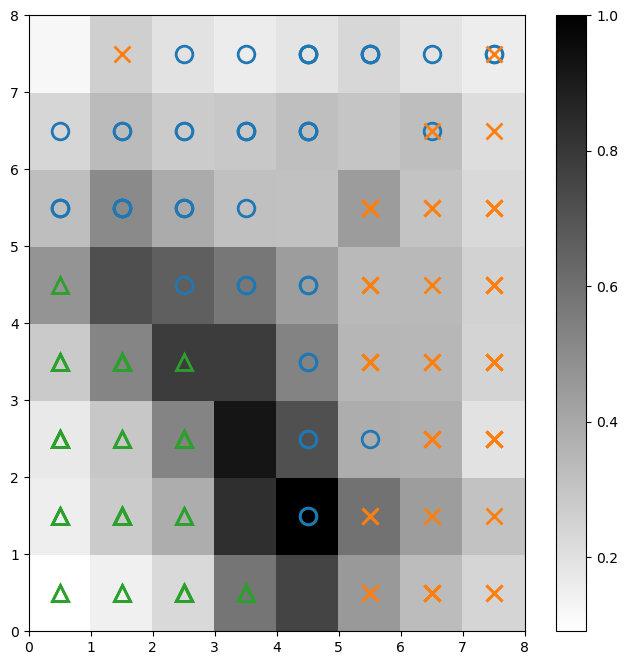

In [60]:
# plot the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg') 
plt.colorbar()
# create the markers and colors for each class
markers = ['o', 'x', '^']
colors = ['C0', 'C1', 'C2']
# plot the winning neuron for each data point
for count, datapoint in enumerate(data):
    # get the winner
    w = som.winner(datapoint)  
    # place a marker on the winning position for the sample data point
    plt.plot(w[0]+.5, w[1]+.5, markers[target[count]-1], markerfacecolor='None',
             markeredgecolor=colors[target[count]-1], markersize=12, markeredgewidth=2)
plt.show()

#### Visualizing the clustering outcome

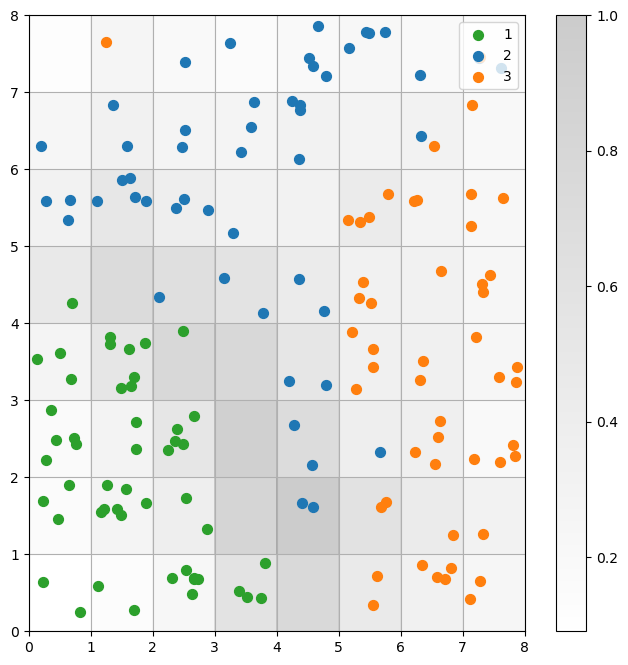

In [65]:
# get the X and Y coordinates of the winning neuron for each data point
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)
# plot the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='gist_yarg', alpha=.2)
plt.colorbar()
# make a scatter plot of all the winning neurons for each data point
# add a random offset to each point to avoid overlaps
for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, 
                c=colors[c-1], 
                label=labels_iris[c+1]
                )
plt.legend(loc='upper right')
plt.grid()
plt.show()